Index(['1', '0.0000', '0', 'Unnamed: 3'], dtype='object')


,indices,waste,Calpha,notcare
0,2,0.0,2.6749,NaN
1,3,0.0,2.9968,NaN
2,4,0.0,2.6467,NaN
3,5,0.0,1.2673,NaN
4,6,0.0,0.9748,NaN
...,...,...,...,...
221,223,0.0,0.4887,NaN
222,224,0.0,0.0000,NaN
223,225,0.0,1.9866,NaN
224,226,0.0,2.0648,NaN


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

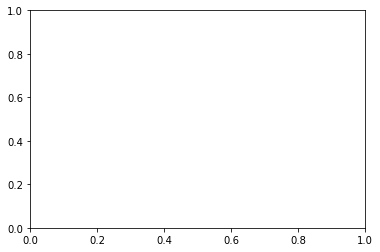

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import numpy as np

df = pd.read_csv('chainA_new.dat', delimiter=' ')
new_column_names = ['indices', 'waste', 'Calpha', 'notcare']
df.columns = new_column_names

def calculate_residue_num(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]
    chain_a_atoms = model['A'].get_atoms()
    residue_numbers = []

    for atom in chain_a_atoms:
        if atom.get_id() == 'CA':
            residue_numbers.append(atom.get_parent().get_id()[1])

    return residue_numbers

pdb_file = '5uh5.pdb'  # Choose one of the PDB files
residue_numbers = calculate_residue_num(pdb_file)
residue_numbers = np.unique(residue_numbers)

plt.plot(df['Calpha'],residue_numbers)
plt.xlabel('Residue')
plt.ylabel('Calpha')
plt.title('Calpha Values for Chain A')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1279,) and (1293,)

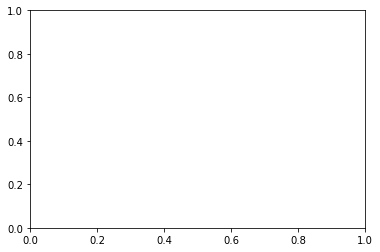

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

df = pd.read_csv('chainD_new.dat', delimiter=' ')
new_column_names = ['indices', 'waste', 'Calpha', 'notcare']
df.columns = new_column_names

def calculate_residue_num(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]
    chain_a_atoms = model['D'].get_atoms()
    residue_numbers = []

    for atom in chain_a_atoms:
        if atom.get_id() == 'CA':
            residue_numbers.append(atom.get_parent().get_id()[1])

    return residue_numbers

pdb_file = '6c04_woRbpA.pdb'  # Choose one of the PDB files
residue_numbers = calculate_residue_num(pdb_file)

plt.plot(residue_numbers, df['Calpha'].to_numpy())  # Convert column to numpy array
plt.xlabel('Residue')
plt.xlim(min(residue_numbers),max(residue_numbers))
plt.ylabel('Calpha')
plt.title('Calpha Values for Chain A')
plt.show()


In [24]:
len(residue_numbers)


224